In [ ]:
#feel free to play around with the code

In [2]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)
clf = svm.SVC(kernel = 'linear')
clf.fit(X, y)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [45]:
X.shape, y.shape

((40, 2), (40,))

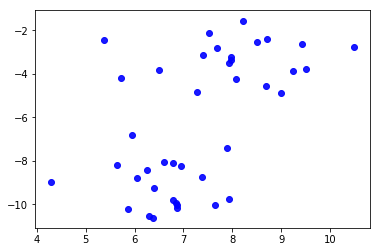

In [3]:
plt.scatter(X[:, 0], X[:, 1], c='b', alpha=0.9)
plt.show()

In [33]:
#X_test = [[0.7,0.7]]
#X_test = np.asarray(X_test)
#X_test.reshape(1,-1)
#clf.predict(X_test)

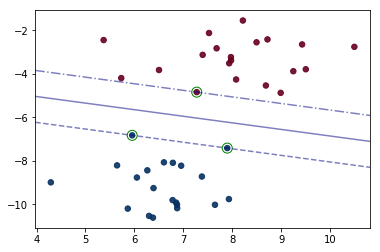

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='RdBu', alpha=0.9)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
#
#Z2 = clf.decision_function(xy)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='#000080', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['-.', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='g')

#for i in range(30):
#    for j in range(30):
#        ax.scatter(XX[i][i],YY[j][j],marker = '.')#meshgrid
#ax.scatter(XX[3],YY[[0]], marker = '.')
#for i in range(0,900):
#    ax.scatter(xy[i][0],xy[i][1], c='b', marker = '.') #meshgrid

#ax.scatter(xy[:, 0],xy[:, 1], c=Z2,cmap = 'seismic', marker = '.', alpha=0.5) #meshgrid

plt.show()

In [40]:
XX.shape,YY.shape, Z.shape, xy.shape, xx.shape, yy.shape

((30, 30), (30, 30), (30, 30), (900, 2), (30,), (30,))

In [37]:
#xy

In [47]:
#clf.decision_function([[6.25, -7.1],[6.96,-6.03]])

prediction [1]


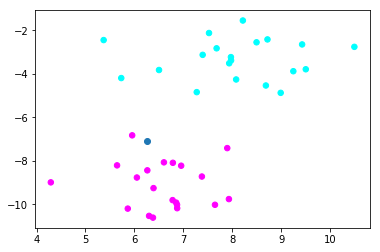

In [8]:
X_test = [[6.25, -7.1]]
y_test = [1]
y_pred = clf.predict(X_test)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='cool')
ax1.scatter(6.25, -7.1)
print("prediction",y_pred)
#ax1.scatter()
plt.show()

In [22]:
clf.coef_[0]

array([-0.2539717 , -0.83806387])

In [5]:
clf.intercept_ , clf.support_vectors_

(array([-3.21132826]), array([[ 7.27059007, -4.84225716],
        [ 5.95313618, -6.82945967],
        [ 7.89359985, -7.41655113]]))

In [6]:
w = clf.coef_[0]
a = -w[0] / w[1]
#sup = clf.support_vectors_.T # uses support vectors and takes transpose to plot
a,w,sup,

(-0.3030457609011407,
 array([-0.2539717 , -0.83806387]),
 array([[ 7.27059007,  5.95313618,  7.89359985],
        [-4.84225716, -6.82945967, -7.41655113]]))

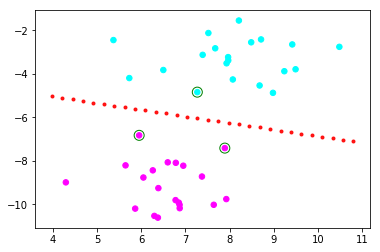

In [25]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='cool')

ax1 = plt.gca()
xlim = ax1.get_xlim()
ylim = ax1.get_ylim()
#ax1.scatter(sup[0],sup[1])

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = a * xx - (clf.intercept_[0]) / w[1]
ax1.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='g')


ax1.scatter(xx,yy, c= 'r',marker = '.',alpha = 0.9)

plt.show()

In [26]:
clf.decision_function(xy[[0]])


array([5.0672251])

In [18]:
clf.decision_function(np.asarray([(XX[0][0]),(YY[0][0])]).reshape(1, -1))

array([5.06170239])